<a href="https://colab.research.google.com/github/dishadutta04/covid-19-analysis/blob/main/COVID_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [ ]:
#Get data from the CSV file:
Covid_data = pd.read_csv('/content/covid_19_data.csv')
Covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [ ]:
# Lets describe the dataframe:
Covid_data.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


In [ ]:
# Letz get some specifics for the data:
print("Shape of the data:",Covid_data.shape)
print("Check for null values and print the count :\n",Covid_data.isnull().sum())
print("Get the datatype for each columns:\n",Covid_data.dtypes)

Shape of the data: (306429, 8)
Check for null values and print the count :
 SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64
Get the datatype for each columns:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [ ]:
# Letz start Analysing the dataset
#First we will drop the Serial No.
Covid_data = Covid_data.drop(['SNo'],axis = 1)
Covid_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [ ]:
# Letz convert ObservationDate to Date time, which can be utilized for analysing
Covid_data['ObservationDate'] = pd.to_datetime(Covid_data['ObservationDate'])
Covid_data

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [ ]:
# Letz group the Country along with ObservationDate
Grouped_Countries = Covid_data.groupby(['Country/Region','ObservationDate']).agg({"Confirmed":'sum',"Deaths":'sum',"Recovered":'sum'})
Grouped_Countries.sort_values(by='Confirmed',ascending = False)

Confirmed    Deaths  \
Country/Region                 ObservationDate                         
US                             2021-05-29       33251939.0  594306.0   
                               2021-05-28       33239963.0  593963.0   
                               2021-05-27       33217995.0  593288.0   
                               2021-05-26       33190470.0  591950.0   
                               2021-05-25       33166418.0  590941.0   
...                                                    ...       ...   
Kiribati                       2020-11-18              0.0       0.0   
                               2020-11-17              0.0       0.0   
                               2020-11-16              0.0       0.0   
                               2020-11-15              0.0       0.0   
occupied Palestinian territory 2020-03-17              0.0       0.0   

                                                Recovered  
Country/Region                 ObservationDate             
US                             2021-05-29             0.0  
                               2021-05-28             0.0  
                               2021-05-27             0.0  
                               2021-05-26             0.0  
                               2021-05-25             0.0  
...                                                   ...  
Kiribati                       2020-11-18             0.0  
                               2020-11-17             0.0  
                               2020-11-16             0.0  
                               2020-11-15             0.0  
occupied Palestinian territory 2020-03-17             0.0  

[87281 rows x 3 columns]

In [ ]:
Grouped_Countries['Active Cases'] = Grouped_Countries['Confirmed'] - Grouped_Countries['Deaths'] - Grouped_Countries['Recovered']
Grouped_Countries['log_confirmed'] = np.log(Grouped_Countries['Confirmed'])
Grouped_Countries['log_active'] = np.log(Grouped_Countries['Active Cases'])
Grouped_Countries

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

divide by zero encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log



Confirmed  Deaths  Recovered  \
Country/Region                 ObservationDate                                 
 Azerbaijan                    2020-02-28             1.0     0.0        0.0   
('St. Martin',)                2020-03-10             2.0     0.0        0.0   
Afghanistan                    2020-02-24             1.0     0.0        0.0   
                               2020-02-25             1.0     0.0        0.0   
                               2020-02-26             1.0     0.0        0.0   
...                                                   ...     ...        ...   
occupied Palestinian territory 2020-03-12             0.0     0.0        0.0   
                               2020-03-14             0.0     0.0        0.0   
                               2020-03-15             0.0     0.0        0.0   
                               2020-03-16             0.0     0.0        0.0   
                               2020-03-17             0.0     0.0        0.0   

                                                Active Cases  log_confirmed  \
Country/Region                 ObservationDate                                
 Azerbaijan                    2020-02-28                1.0       0.000000   
('St. Martin',)                2020-03-10                2.0       0.693147   
Afghanistan                    2020-02-24                1.0       0.000000   
                               2020-02-25                1.0       0.000000   
                               2020-02-26                1.0       0.000000   
...                                                      ...            ...   
occupied Palestinian territory 2020-03-12                0.0           -inf   
                               2020-03-14                0.0           -inf   
                               2020-03-15                0.0           -inf   
                               2020-03-16                0.0           -inf   
                               2020-03-17                0.0           -inf   

                                                log_active  
Country/Region                 ObservationDate              
 Azerbaijan                    2020-02-28         0.000000  
('St. Martin',)                2020-03-10         0.693147  
Afghanistan                    2020-02-24         0.000000  
                               2020-02-25         0.000000  
                               2020-02-26         0.000000  
...                                                    ...  
occupied Palestinian territory 2020-03-12             -inf  
                               2020-03-14             -inf  
                               2020-03-15             -inf  
                               2020-03-16             -inf  
                               2020-03-17             -inf  

[87281 rows x 6 columns]

# Now letz analyse datewise

In [ ]:
datewise = Covid_data.groupby(['ObservationDate']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Active Cases"] = datewise["Confirmed"] - datewise["Recovered"] - datewise["Deaths"]
datewise["Days Since"] = datewise.index - datewise.index.min()
datewise

,Confirmed,Recovered,Deaths,Active Cases,Days Since
ObservationDate,,,,,
2020-01-22,557.0,30.0,17.0,510.0,0 days
2020-01-23,1097.0,60.0,34.0,1003.0,1 days
2020-01-24,941.0,39.0,26.0,876.0,2 days
2020-01-25,1437.0,42.0,42.0,1353.0,3 days
2020-01-26,2118.0,56.0,56.0,2006.0,4 days
...,...,...,...,...,...
2021-05-25,167848207.0,104824935.0,3485788.0,59537484.0,489 days
2021-05-26,168416423.0,105380748.0,3498544.0,59537131.0,490 days
2021-05-27,168970791.0,106078106.0,3511297.0,59381388.0,491 days


In [ ]:
print("Letz look into basic informations:")
print("Total number of countries with Disease spread", len(Covid_data['Country/Region'].unique()))
print("Total number of confirmed cases around the world",datewise["Confirmed"].iloc[-1])
print("Total number of recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of deaths around the world due to COVID-19",datewise["Deaths"].iloc[-1])
print("Total number of active cases around the world ",datewise["Active Cases"].iloc[-1])
print("Total number of closed cases around the world ",datewise["Confirmed"].iloc[-1]-datewise["Active Cases"].iloc[-1])
print("An approximate number of confirmed cases per day around the world ",np.round(datewise["Confirmed"].iloc[-1]/len(datewise)))
print("An approximate number of Recovered cases per day around the world",np.round(datewise["Recovered"].iloc[-1]/len(datewise)))
print("An approximate number of Death cases per day around the world",np.round(datewise["Deaths"].iloc[-1]/len(datewise)))
print("An approximate number of confirmed cases per hour around the world",np.round(datewise["Confirmed"].iloc[-1]/(len(datewise)*24)))
print("An approximate number of Recovered cases per hour around the world",np.round(datewise["Recovered"].iloc[-1]/(len(datewise)*24)))
print("An approximate number of Death cases per hour around the world", np.round(datewise["Deaths"].iloc[-1]/(len(datewise)*24)))
print("Number of confirmed case in last 24 hours:",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of confirmed case in last 24 hours:",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of confirmed case in last 24 hours:",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Letz look into basic informations:
Total number of countries with Disease spread 229
Total number of confirmed cases around the world 169951560.0
Total number of recovered cases around the world 107140669.0
Total number of deaths around the world due to COVID-19 3533619.0
Total number of active cases around the world  59277272.0
Total number of closed cases around the world  110674288.0
An approximate number of confirmed cases per day around the world  344031.0
An approximate number of Recovered cases per day around the world 216884.0
An approximate number of Death cases per day around the world 7153.0
An approximate number of confirmed cases per hour around the world 14335.0
An approximate number of Recovered cases per hour around the world 9037.0
An approximate number of Death cases per hour around the world 298.0
Number of confirmed case in last 24 hours: 480835.0
Number of confirmed case in last 24 hours: 507600.0
Number of confirmed case in last 24 hours: 10502.0


In [ ]:
fig = px.bar(x=datewise.index,y = datewise["Active Cases"])
fig.update_layout(title = "Distribution of No. of Active cases with respect to Months",xaxis_title="Date",
                  yaxis_title="Number of Active Cases")
fig.show()

In [ ]:
fig2 = px.bar(x=datewise.index,y = datewise["Confirmed"] - datewise["Active Cases"])
fig2.update_layout(title = "Distribution of No. of Close cases with respect to Months",xaxis_title="Date",yaxis_title="Number of Active Cases")
fig2.show()

In [ ]:
# Letz analyse for United States
US_Data = Covid_data[Covid_data["Country/Region"] == 'US'].copy()
US_Data.reset_index(inplace = True)
US_Data["Active Cases"] = US_Data["Confirmed"] -(US_Data["Deaths"] + US_Data["Recovered"])
US_Data

,index,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active Cases
0,31,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,1.0
1,71,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0,1.0
2,121,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0,1.0
3,122,2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,1.0
4,164,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
26735,306395,2021-05-29,Virginia,US,2021-05-30 04:20:55,675165.0,11160.0,0.0,664005.0
26736,306405,2021-05-29,Washington,US,2021-05-30 04:20:55,435849.0,5765.0,0.0,430084.0
26737,306408,2021-05-29,West Virginia,US,2021-05-30 04:20:55,161287.0,2792.0,0.0,158495.0
26738,306410,2021-05-29,Wisconsin,US,2021-05-30 04:20:55,674003.0,7830.0,0.0,666173.0


In [ ]:
State_US_data = US_Data.groupby(['Province/State']).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum',"Active Cases":'sum'}).sort_values(by='Active Cases',ascending = False)

State_US_data

,Confirmed,Recovered,Deaths,Active Cases
Province/State,,,,
California,696898013.0,40.0,10831870.0,686066103.0
Texas,552039886.0,0.0,9517809.0,542522077.0
Florida,429469197.0,0.0,7261979.0,422207218.0
New York,380636880.0,0.0,15531696.0,365105184.0
Illinois,263055187.0,16.0,5589797.0,257465374.0
...,...,...,...,...
"Shasta County, CA",1.0,0.0,0.0,1.0
"Montgomery County, TX",0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0


In [ ]:
y_label = State_US_data[0:20]#State_US_data['Confirmed']>1000]
#y_label
#State_US_data.index[0:20]
fig4 = px.bar(x = State_US_data.index[0:20], y = State_US_data["Active Cases"].iloc[0:20])
fig4.update_layout(title = "Top 20 State Active cases",xaxis_title = "Top 20 States",yaxis_title = "Total No. of Cases")
#px.bar(x = US_Data["Province/State"], y= US_Data["Confirmed"])#- (US_Data['Recovered'] + US_Data['Deaths']))
fig4.show()

In [ ]:
fig5 = go.Figure()
fig5.add_trace(go.Scatter(x=datewise.index,y = datewise["Confirmed"],mode='lines+markers',name='Confirmed Cases'))
fig5.add_trace(go.Scatter(x=datewise.index,y = datewise["Recovered"],mode='lines+markers',name="Recovered Cases"))
fig5.add_trace(go.Scatter(x=datewise.index,y = datewise["Deaths"],mode='lines+markers',name='Deaths'))
fig5.add_trace(go.Scatter(x=datewise.index,y=datewise["Active Cases"],mode='lines+markers',name='Active Cases'))
fig5.update_layout(title='Distribution of cases wrt Months',xaxis_title='Month',yaxis_title='No. of Cases',legend = dict(x=0,y=1,traceorder='normal'))
fig5.show()

In [ ]:
datewise['Closed Cases'] = datewise['Confirmed'] - datewise['Active Cases']
datewise['Mortality Rate'] = (datewise['Deaths']/datewise['Confirmed'])*100
datewise['Recovery Rate'] = (datewise['Recovered']/datewise['Confirmed'])*100
datewise

,Confirmed,Recovered,Deaths,Active Cases,Days Since,Closed Cases,Mortality Rate,Recovery Rate
ObservationDate,,,,,,,,
2020-01-22,557.0,30.0,17.0,510.0,0 days,47.0,3.052065,5.385996
2020-01-23,1097.0,60.0,34.0,1003.0,1 days,94.0,3.099362,5.469462
2020-01-24,941.0,39.0,26.0,876.0,2 days,65.0,2.763018,4.144527
2020-01-25,1437.0,42.0,42.0,1353.0,3 days,84.0,2.922756,2.922756
2020-01-26,2118.0,56.0,56.0,2006.0,4 days,112.0,2.644004,2.644004
...,...,...,...,...,...,...,...,...
2021-05-25,167848207.0,104824935.0,3485788.0,59537484.0,489 days,108310723.0,2.076750,62.452222
2021-05-26,168416423.0,105380748.0,3498544.0,59537131.0,490 days,108879292.0,2.077318,62.571539
2021-05-27,168970791.0,106078106.0,3511297.0,59381388.0,491 days,109589403.0,2.078050,62.778960


In [ ]:
print("Average Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Average Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

Average Mortality Rate 3.398557417508881
Median Mortality Rate 2.772038814120292
Average Recovery Rate 51.148201824468615
Median Recovery Rate 56.426751740200025


In [ ]:
fig6= go.Figure()
fig6.add_trace(go.Scatter(x=datewise.index,y=datewise['Mortality Rate'],mode='lines+markers',name='Mortality Rate'))
fig6.add_trace(go.Scatter(x=datewise.index,y=datewise['Recovery Rate'],mode='lines+markers',name='Recovery Rate'))
fig6.update_layout(title="Mortality Rate vs Recovery Rate",xaxis_title="Months",yaxis_title="Percentage",legend = dict(x=0,y=1,traceorder='normal'))
fig6.show()

In [ ]:
print("Average increase in number of confirmed cases (by days:)",datewise['Confirmed'].diff().fillna(0).mean())
print("Average increase in number of recovered cases (by days:)",datewise['Recovered'].diff().fillna(0).mean())
print("Average increase in number of Death cases (by days:)",datewise['Deaths'].diff().fillna(0).mean())
fig7 = go.Figure()
fig7.add_trace(go.Scatter(x=datewise.index,y=datewise['Confirmed'].diff().fillna(0),mode='lines+markers',name='Confirmed Cases(days)'))
fig7.add_trace(go.Scatter(x=datewise.index,y=datewise['Recovered'].diff().fillna(0),mode='lines+markers',name='Recovered Cases(days)'))
fig7.add_trace(go.Scatter(x=datewise.index,y=datewise['Deaths'].diff().fillna(0),mode='lines+markers',name='Deaths Cases(days)'))
fig7.update_layout(title='Daily increase in cases',xaxis_title='Months',yaxis_title='No. of cases',legend=dict(x=0,y=1,traceorder='normal'))
fig7.show()

Average increase in number of confirmed cases (by days:) 344030.37044534413
Average increase in number of recovered cases (by days:) 216883.88461538462
Average increase in number of Death cases (by days:) 7153.04048582996


In [ ]:
fig8 = go.Figure()
fig8.add_trace(go.Scatter(x=datewise.index,y=datewise['Confirmed'].diff().rolling(window=7).mean(),mode='lines+markers',name='Confirmed Cases'))
fig8.add_trace(go.Scatter(x=datewise.index,y=datewise['Recovered'].diff().rolling(window=7).mean(),mode='lines+markers',name='Recovered Cases'))
fig8.add_trace(go.Scatter(x=datewise.index,y = datewise['Deaths'].diff().rolling(window=7).mean(),mode='lines+markers',name='Death Cases'))
fig8.update_layout(title='Distribution with respect to 7 days',xaxis_title='Months',yaxis_title='No. of Cases',legend=dict(x=0,y=1,traceorder='normal'))
fig8.show()

Growth Factor


Growth factor is the factor by which a quantity multiplies itself over time. The formula used is:

Formula: Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

In [ ]:
print("Average growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).mean())
print("Median growth factor of number of Confirmed Cases: ",(datewise["Confirmed"]/datewise["Confirmed"].shift()).median())
print("Average growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).mean())
print("Median growth factor of number of Recovered Cases: ",(datewise["Recovered"]/datewise["Recovered"].shift()).median())
print("Average growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).mean())
print("Median growth factor of number of Death Cases: ",(datewise["Deaths"]/datewise["Deaths"].shift()).median())

Average growth factor of number of Confirmed Cases:  1.0281591322080432
Median growth factor of number of Confirmed Cases:  1.0105328040968438
Average growth factor of number of Recovered Cases:  1.033783342773454
Median growth factor of number of Recovered Cases:  1.0112782082196978
Average growth factor of number of Death Cases:  1.027312583713661
Median growth factor of number of Death Cases:  1.0071398973639754


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Confirmed"]/datewise["Confirmed"].shift(),
                    mode='lines',
                    name='Growth Factor of Confirmed Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Recovered"]/datewise["Recovered"].shift(),
                    mode='lines',
                    name='Growth Factor of Recovered Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Deaths"]/datewise["Deaths"].shift(),
                    mode='lines',
                    name='Growth Factor of Death Cases'))
fig.update_layout(title="Datewise Growth Factor of different types of cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0.7,y=1,traceorder="normal"))
fig.show()

In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index,
                         y=(datewise['Active Cases']/datewise['Active Cases'].shift()),
                    mode='lines',
                    name='Growth Factor of Active Cases'))
fig.add_trace(go.Scatter(x=datewise.index, y=(datewise["Recovered"]+datewise["Deaths"])/(datewise["Recovered"]+datewise["Deaths"]).shift(),
                    mode='lines',
                    name='Growth Factor of Closed Cases'))
fig.update_layout(title="Datewise Growth Factor of Active and Closed Cases",
                 xaxis_title="Date",yaxis_title="Growth Factor",
                 legend=dict(x=0.7,y=1,traceorder="normal"))
fig.show()

Countrywise Analysis

In [ ]:
# Letz start analysing with respect to countrywise:
countrywise = Covid_data[Covid_data['ObservationDate']==Covid_data['ObservationDate'].max()].groupby(['Country/Region']).agg({"Confirmed":'sum',"Deaths":'sum',"Recovered":'sum'}).sort_values(by='Confirmed',ascending=False)
countrywise

,Confirmed,Deaths,Recovered
Country/Region,,,
US,33251939.0,594306.0,0.0
India,27894800.0,325972.0,25454320.0
Brazil,16471600.0,461057.0,14496224.0
France,5719877.0,109518.0,390878.0
Turkey,5235978.0,47271.0,5094279.0
...,...,...,...
Vanuatu,4.0,1.0,3.0
Marshall Islands,4.0,0.0,4.0
Samoa,3.0,0.0,3.0


In [ ]:
countrywise['Active Cases'] = countrywise['Confirmed'] - countrywise['Deaths'] - countrywise['Recovered']
countrywise['Mortality'] = np.round((countrywise['Deaths']/countrywise['Confirmed'])*100)
countrywise['Recovered'] = np.round((countrywise['Recovered']/countrywise['Confirmed'])*100)
#grouped_country = countrywise.copy()

In [ ]:
country_last_24_confirmed=[]
country_last_24_recovered=[]
country_last_24_deaths=[]
for country in countrywise.index:
    country_last_24_confirmed.append((Grouped_Countries.loc[country].iloc[-1]-Grouped_Countries.loc[country].iloc[-2])["Confirmed"])
    country_last_24_recovered.append((Grouped_Countries.loc[country].iloc[-1]-Grouped_Countries.loc[country].iloc[-2])["Recovered"])
    country_last_24_deaths.append((Grouped_Countries.loc[country].iloc[-1]-Grouped_Countries.loc[country].iloc[-2])["Deaths"])

In [ ]:
Last_24_Hours_country=pd.DataFrame(list(zip(countrywise.index,country_last_24_confirmed,country_last_24_recovered,country_last_24_deaths)),
                                   columns=["Country Name","Last 24 Hours Confirmed","Last 24 Hours Recovered","Last 24 Hours Deaths"])
Last_24_Hours_country

,Country Name,Last 24 Hours Confirmed,Last 24 Hours Recovered,Last 24 Hours Deaths
0,US,11976.0,0.0,343.0
1,India,165553.0,276309.0,3460.0
2,Brazil,79670.0,3523.0,2012.0
3,France,11527.0,682.0,66.0
4,Turkey,7656.0,11180.0,137.0
...,...,...,...,...
190,Vanuatu,0.0,0.0,0.0
191,Marshall Islands,0.0,0.0,0.0
192,Samoa,0.0,0.0,0.0
193,Kiribati,0.0,0.0,0.0


Text(0.5, 1.0, 'Top 15 Countries with Highest Number of Death Cases in Last 24 Hours')

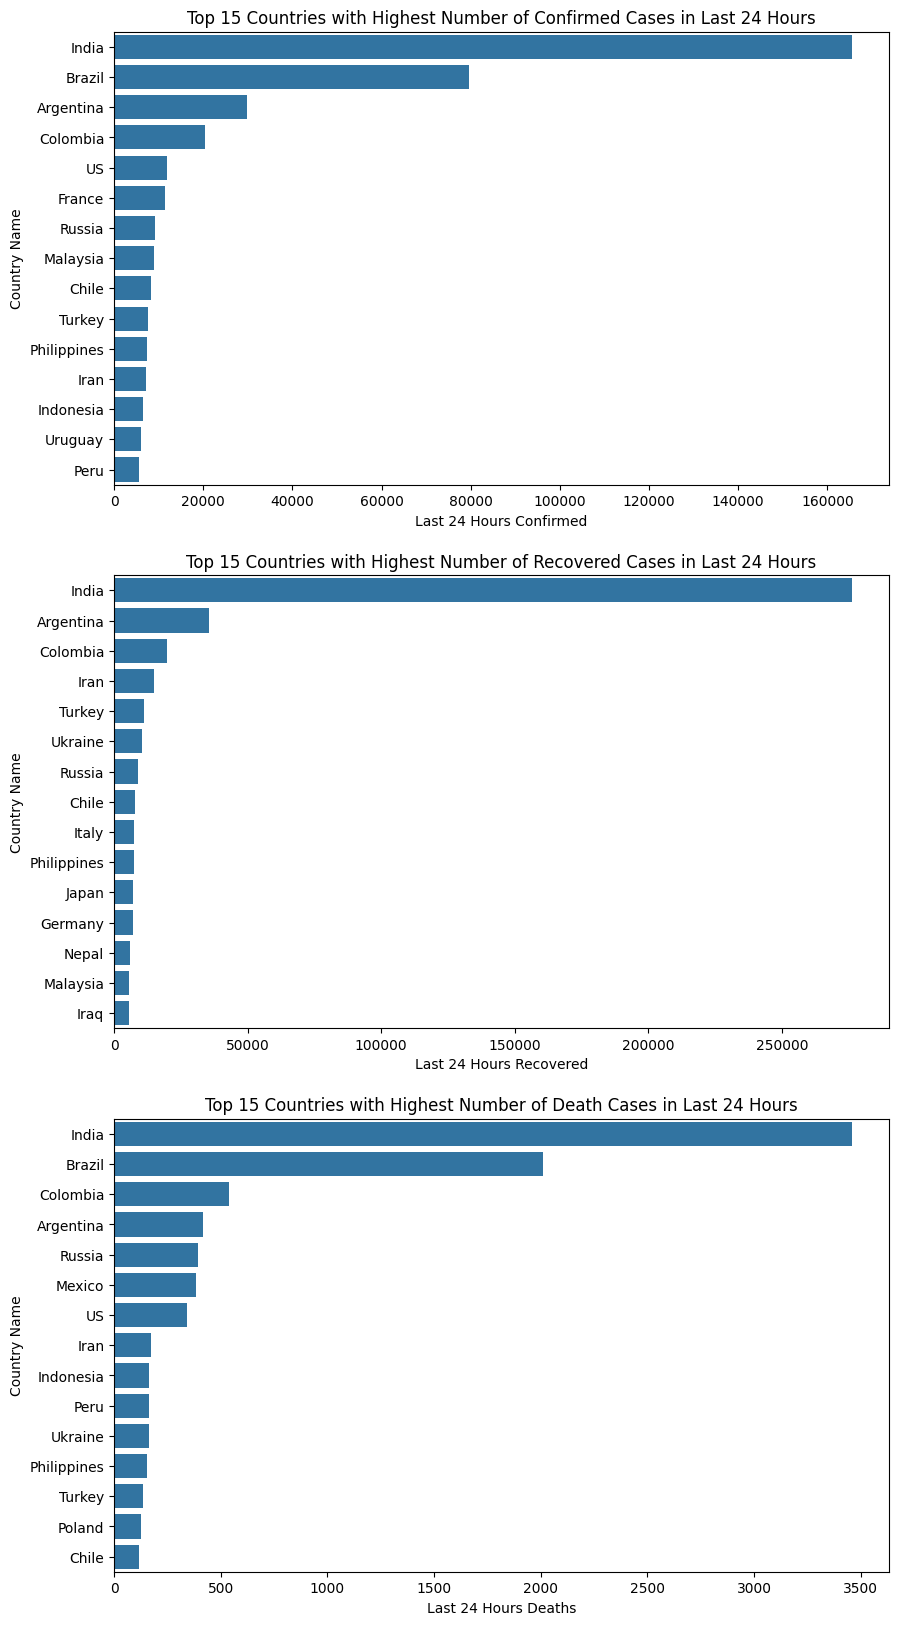

In [ ]:
Top_15_Confirmed_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Confirmed"],ascending=False).head(15)
Top_15_Recoverd_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Recovered"],ascending=False).head(15)
Top_15_Deaths_24hr=Last_24_Hours_country.sort_values(["Last 24 Hours Deaths"],ascending=False).head(15)


fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(10,20))
seaborn.barplot(x=Top_15_Confirmed_24hr["Last 24 Hours Confirmed"],y=Top_15_Confirmed_24hr["Country Name"],ax=ax1)
ax1.set_title("Top 15 Countries with Highest Number of Confirmed Cases in Last 24 Hours")
seaborn.barplot(x=Top_15_Recoverd_24hr["Last 24 Hours Recovered"],y=Top_15_Recoverd_24hr["Country Name"],ax=ax2)
ax2.set_title("Top 15 Countries with Highest Number of Recovered Cases in Last 24 Hours")
seaborn.barplot(x=Top_15_Deaths_24hr["Last 24 Hours Deaths"],y=Top_15_Deaths_24hr["Country Name"],ax=ax3)
ax3.set_title("Top 15 Countries with Highest Number of Death Cases in Last 24 Hours")

Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

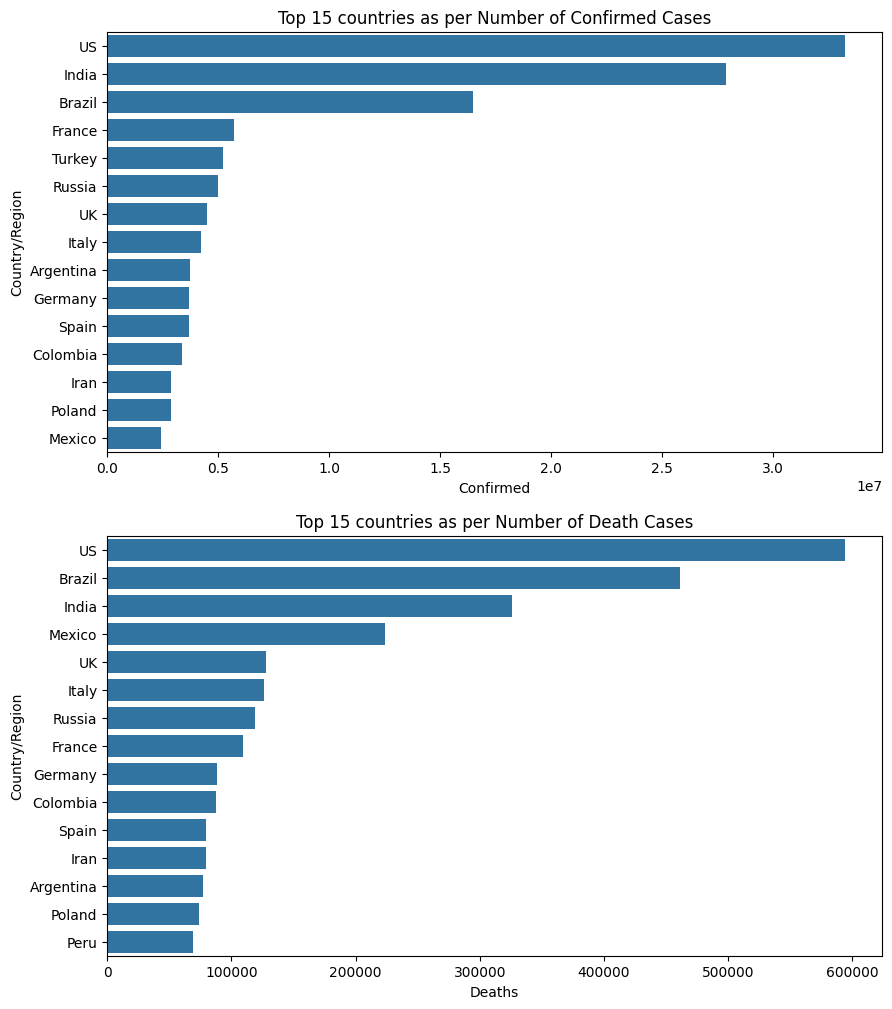

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
seaborn.barplot(x=top_15_confirmed["Confirmed"],y=top_15_confirmed.index,ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
seaborn.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

Text(0.5, 0, 'Recovery (in Percentage)')

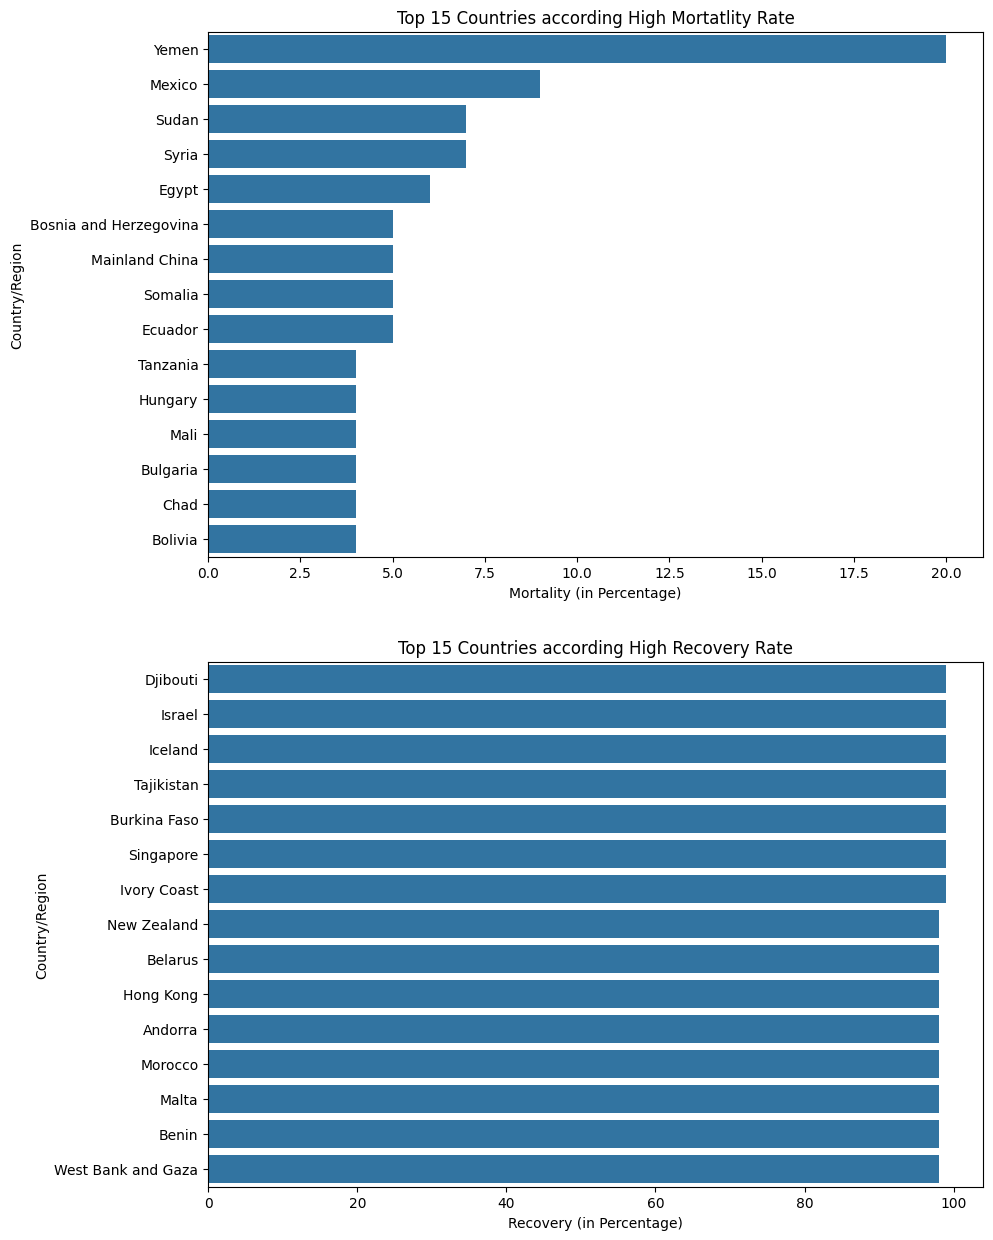

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
seaborn.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Countries according High Mortatlity Rate")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovered"],ascending=False).head(15)
seaborn.barplot(x=countrywise_plot_recover["Recovered"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Countries according High Recovery Rate")
ax2.set_xlabel("Recovery (in Percentage)")


Text(0.5, 1.0, 'Top 15 Countries with Most Number of Closed Cases')

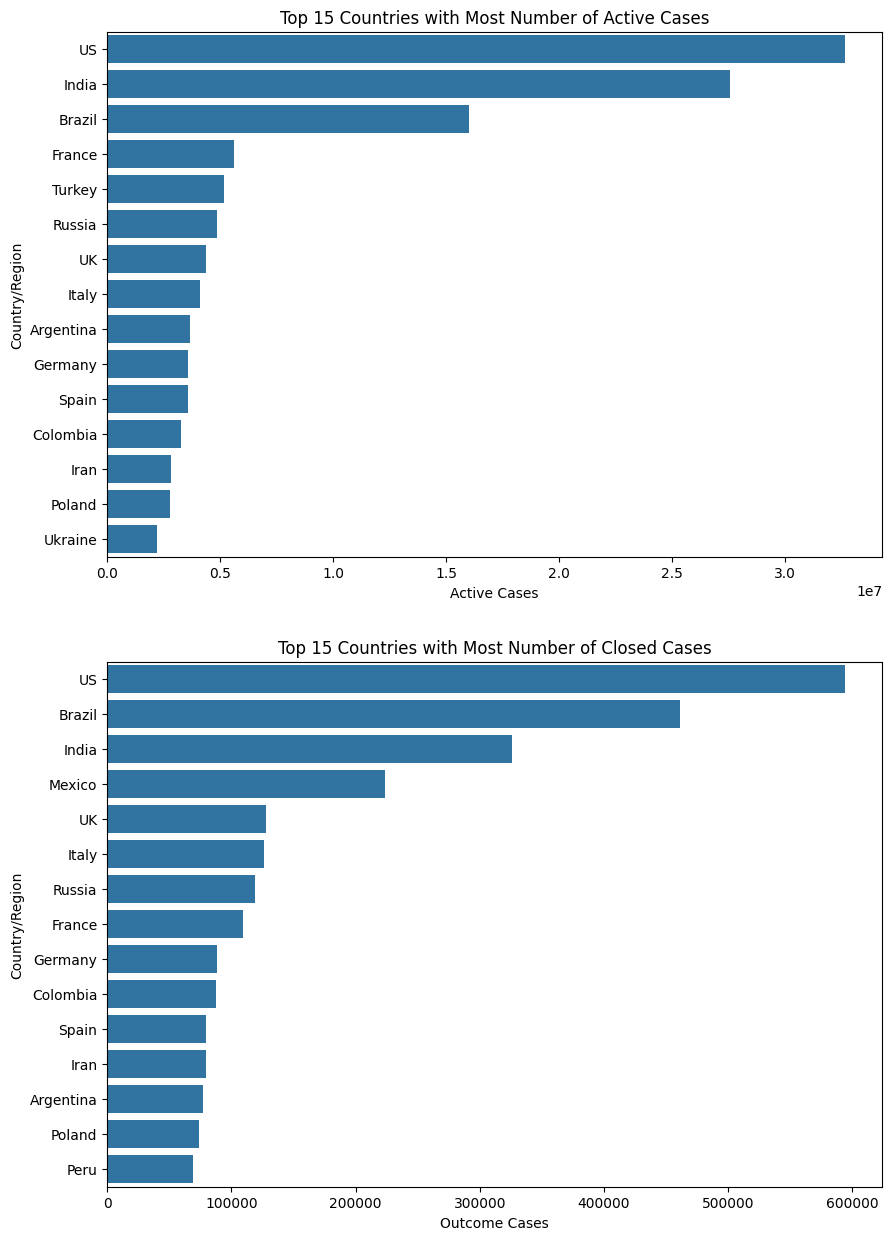

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
seaborn.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
seaborn.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Countries with Most Number of Active Cases")
ax2.set_title("Top 15 Countries with Most Number of Closed Cases")

Mean Survival Probability across all countries 97.83094336678441
Median Survival Probability across all countries 98.38462415588694
Mean Death Probability across all countries 2.1690566332155896
Median Death Probability across all countries 1.6153758441130606


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

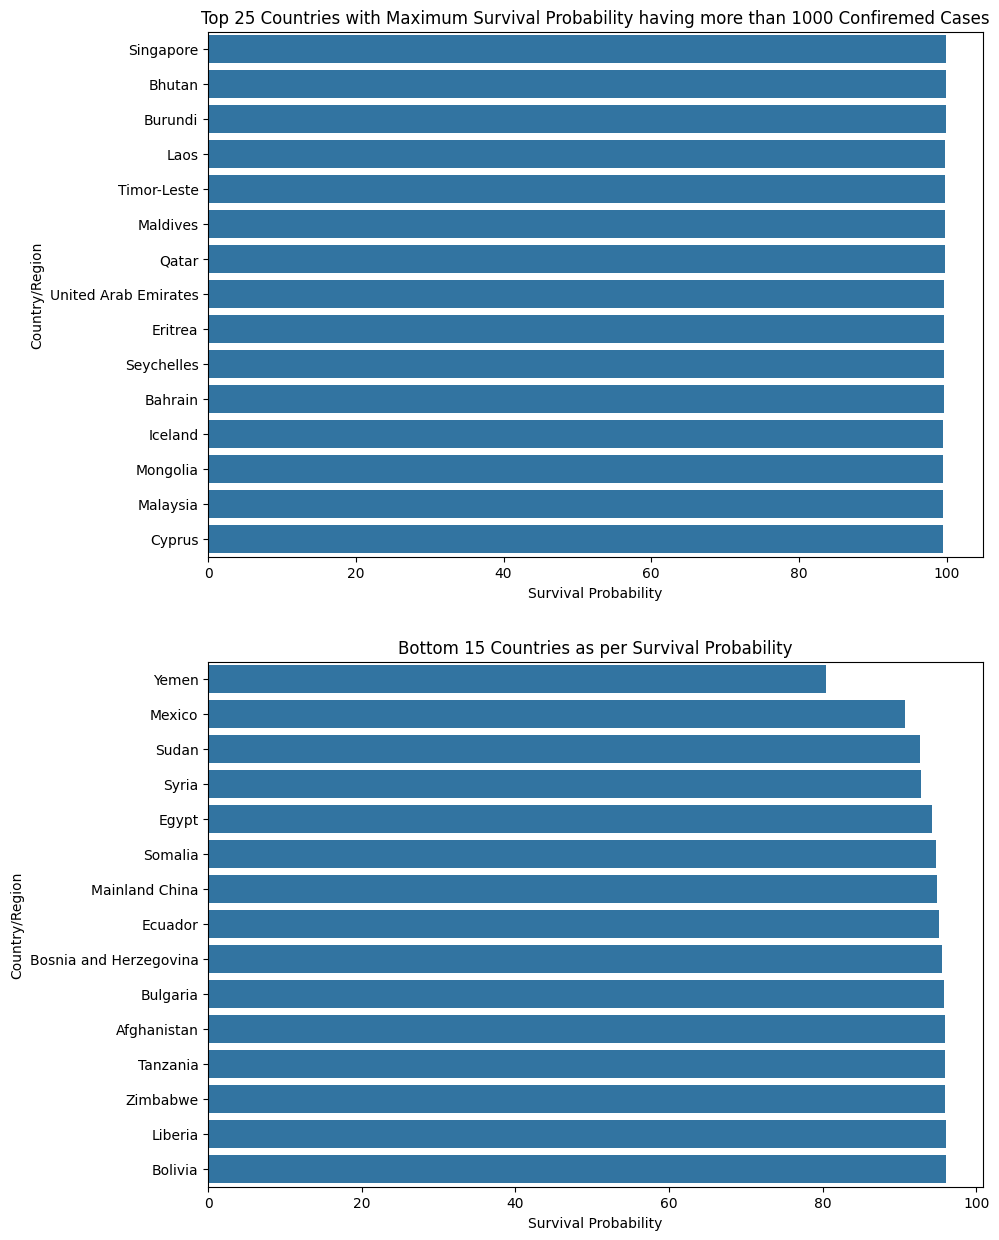

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,15))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
seaborn.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
seaborn.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")